In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Hotel Reservations.csv')

In [3]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [4]:
data.drop('Booking_ID',axis=1,inplace=True)

In [5]:
data.duplicated().sum()

10275

In [6]:
data.drop_duplicates(inplace=True,keep='first')

In [7]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)


In [8]:
data['type_of_meal_plan'].value_counts()

Meal Plan 1     20398
Not Selected     4463
Meal Plan 2      1134
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

# Feature Engineering

In [9]:
def column_info(data):
    cols=[]
    dtypes=[]
    unique_v=[]
    nunique=[]
    
    for col in data.columns:
        cols.append(col)
        dtypes.append(data[col].dtypes)
        unique_v.append(data[col].unique())
        nunique.append(data[col].nunique())
    return pd.DataFrame({'Column':cols,'Data Type':dtypes,'unique Values':unique_v,'Num unique values':nunique})

In [10]:
column_info(data)

,Column,Data Type,unique Values,Num unique values
0,no_of_adults,int64,"[2, 1, 3, 0, 4]",5
1,no_of_children,int64,"[0, 2, 1, 3, 10, 9]",6
2,no_of_weekend_nights,int64,"[1, 2, 0, 4, 3, 6, 5, 7]",8
3,no_of_week_nights,int64,"[2, 3, 1, 4, 5, 0, 10, 6, 11, 7, 15, 9, 13, 8,...",18
4,type_of_meal_plan,object,"[Meal Plan 1, Not Selected, Meal Plan 2, Meal ...",4
5,required_car_parking_space,int64,"[0, 1]",2
6,room_type_reserved,object,"[Room_Type 1, Room_Type 4, Room_Type 2, Room_T...",7
7,lead_time,int64,"[224, 5, 1, 211, 48, 346, 34, 83, 121, 44, 0, ...",352
8,arrival_year,int64,"[2017, 2018]",2
9,arrival_month,int64,"[10, 11, 2, 5, 4, 9, 12, 7, 6, 8, 3, 1]",12


**At least one adult to book a room (data['no_of_adults'] can't be 0)**

In [11]:
data['no_of_adults'].value_counts()

2    18871
1     4800
3     2178
0      135
4       16
Name: no_of_adults, dtype: int64

In [12]:
data[data['no_of_adults']==0]['no_of_children'].value_counts()

2    129
3      5
1      1
Name: no_of_children, dtype: int64

In [13]:
data[data['no_of_children']==2]['no_of_adults'].value_counts()

2    852
0    129
1     51
3      1
Name: no_of_adults, dtype: int64

In [14]:
for i in range(len(data)):
    if data.loc[i,'no_of_adults']==0:
        data.loc[i,'no_of_adults']=2

**no_of_children**

In [15]:
data['no_of_children'].value_counts()

0     23422
1      1524
2      1033
3        18
9         2
10        1
Name: no_of_children, dtype: int64

In [16]:
for i in range(len(data)):
    if data.loc[i,'no_of_children']==9 or data.loc[i,'no_of_children']==10:
        data.loc[i,'no_of_children']=0

**no_of_weekend_nights and no_of_week_nights can't both equal 0 at the same time**

In [17]:
data[data['no_of_weekend_nights']==0]['no_of_week_nights'].value_counts()

1    3876
2    3089
3    2606
4    1237
5     204
0      75
Name: no_of_week_nights, dtype: int64

In [18]:
data.groupby(['no_of_week_nights','no_of_weekend_nights']).count()

no_of_adults  no_of_children  \
no_of_week_nights no_of_weekend_nights                                 
0                 0                               75              75   
                  1                             1186            1186   
                  2                              564             564   
1                 0                             3876            3876   
                  1                             1403            1403   
                  2                             1762            1762   
2                 0                             3089            3089   
                  1                             2246            2246   
                  2                             1856            1856   
3                 0                             2606            2606   
                  1                             1693            1693   
                  2                             1337            1337   
4                 0                             1237            1237   
                  1                              630             630   
                  2                              550             550   
5                 0                              204             204   
                  1                              260             260   
                  2                              895             895   
                  3                               43              43   
                  4                               15              15   
6                 2                              117             117   
                  3                               27              27   
                  4                               29              29   
7                 2                               60              60   
                  3                               34              34   
                  4                               11              11   
8                 2                               38              38   
                  3                               13              13   
                  4                               10              10   
9                 2                               12              12   
                  3                                9               9   
                  4                               10              10   
10                2                                4               4   
                  3                                7               7   
                  4                               31              31   
                  5                                9               9   
11                4                               13              13   
                  5                                4               4   
12                4                                2               2   
                  5                                5               5   
                  6                                2               2   
13                5                                1               1   
                  6                                4               4   
14                5                                1               1   
                  6                                6               6   
15                4                                1               1   
                  5                                4               4   
                  6                                4               4   
16                6                                2               2   
17                6                                2               2   
                  7                                1               1   

                                        type_of_meal_plan  \
no_of_week_nights no_of_weekend_nights                      
0                 0                                    75   
                  1                     

In [19]:
for i in range(len(data)):
    if data.loc[i,'no_of_weekend_nights']==0 and data.loc[i,'no_of_week_nights']==0:
        data.loc[i,'no_of_week_nights']=1

**lead_time**

In [20]:
data['lead_time'].describe()

count    26000.000000
mean        66.452846
std         68.606799
min          0.000000
25%         12.000000
50%         44.000000
75%        100.000000
max        443.000000
Name: lead_time, dtype: float64

**the max lead_time is 459 so all data is possible**

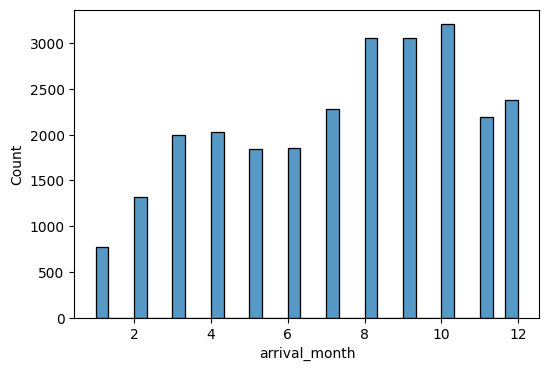

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(data['arrival_month'])
plt.show()

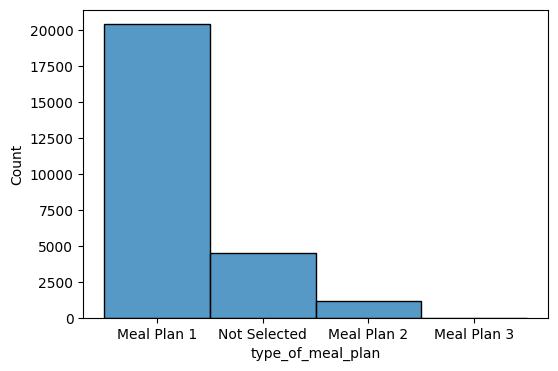

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(data['type_of_meal_plan'])
plt.show()

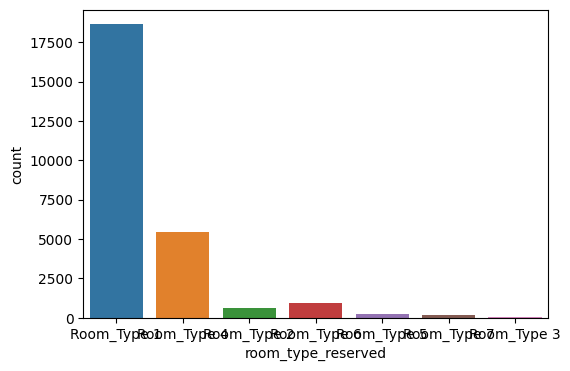

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='room_type_reserved',data=data)
plt.show()

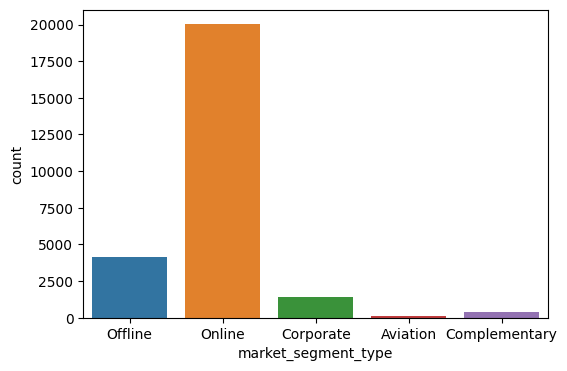

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='market_segment_type',data=data)
plt.show()

**avg_price_per_room**

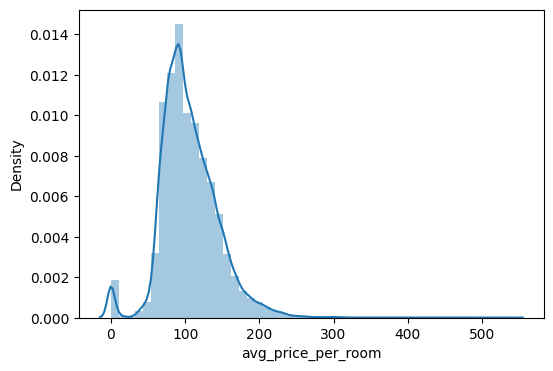

In [25]:
plt.figure(figsize=(6,4))
sns.distplot(data['avg_price_per_room'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e3ffc2ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9e3ff511c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e3ffc2730>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e3ff51880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e3ff51be0>],
 'means': []}

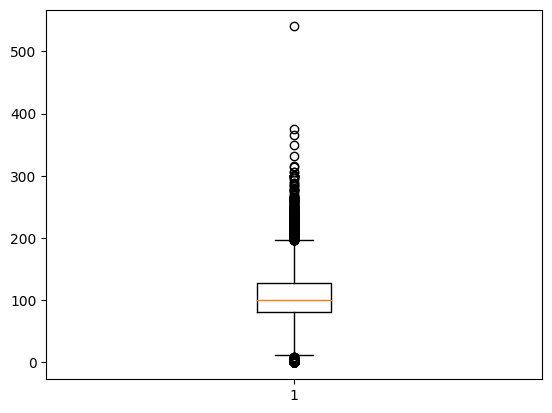

In [26]:
plt.boxplot(data['avg_price_per_room'])

In [27]:
def handle_outliers(data):
    q1=data['avg_price_per_room'].quantile(0.25)
    q3=data['avg_price_per_room'].quantile(0.75)
    
    iqr=q3-q1
    lower_lim=q1-1.5*iqr
    upper_lim=q3+1.5*iqr
    
    for i in range(len(data)):
        if data.loc[i,'avg_price_per_room']>upper_lim:
            data.loc[i,'avg_price_per_room']=upper_lim
        elif data.loc[i,'avg_price_per_room']<lower_lim:
            data.loc[i,'avg_price_per_room']=lower_lim
    return data

data=handle_outliers(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e3ff39a30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9e3ff45130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e3ff396d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e3ff457f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e3ff45b50>],
 'means': []}

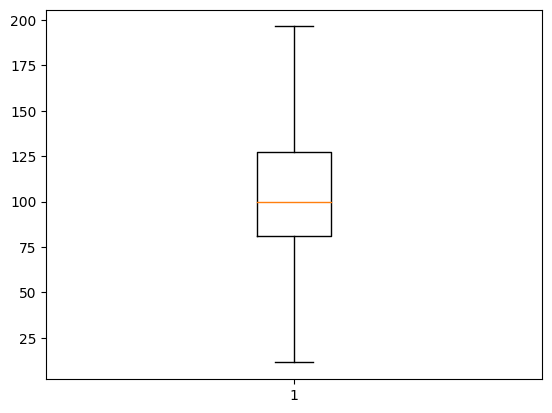

In [28]:
plt.boxplot(data['avg_price_per_room'])

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['booking_status']=le.fit_transform(data['booking_status'])

# linear correlation

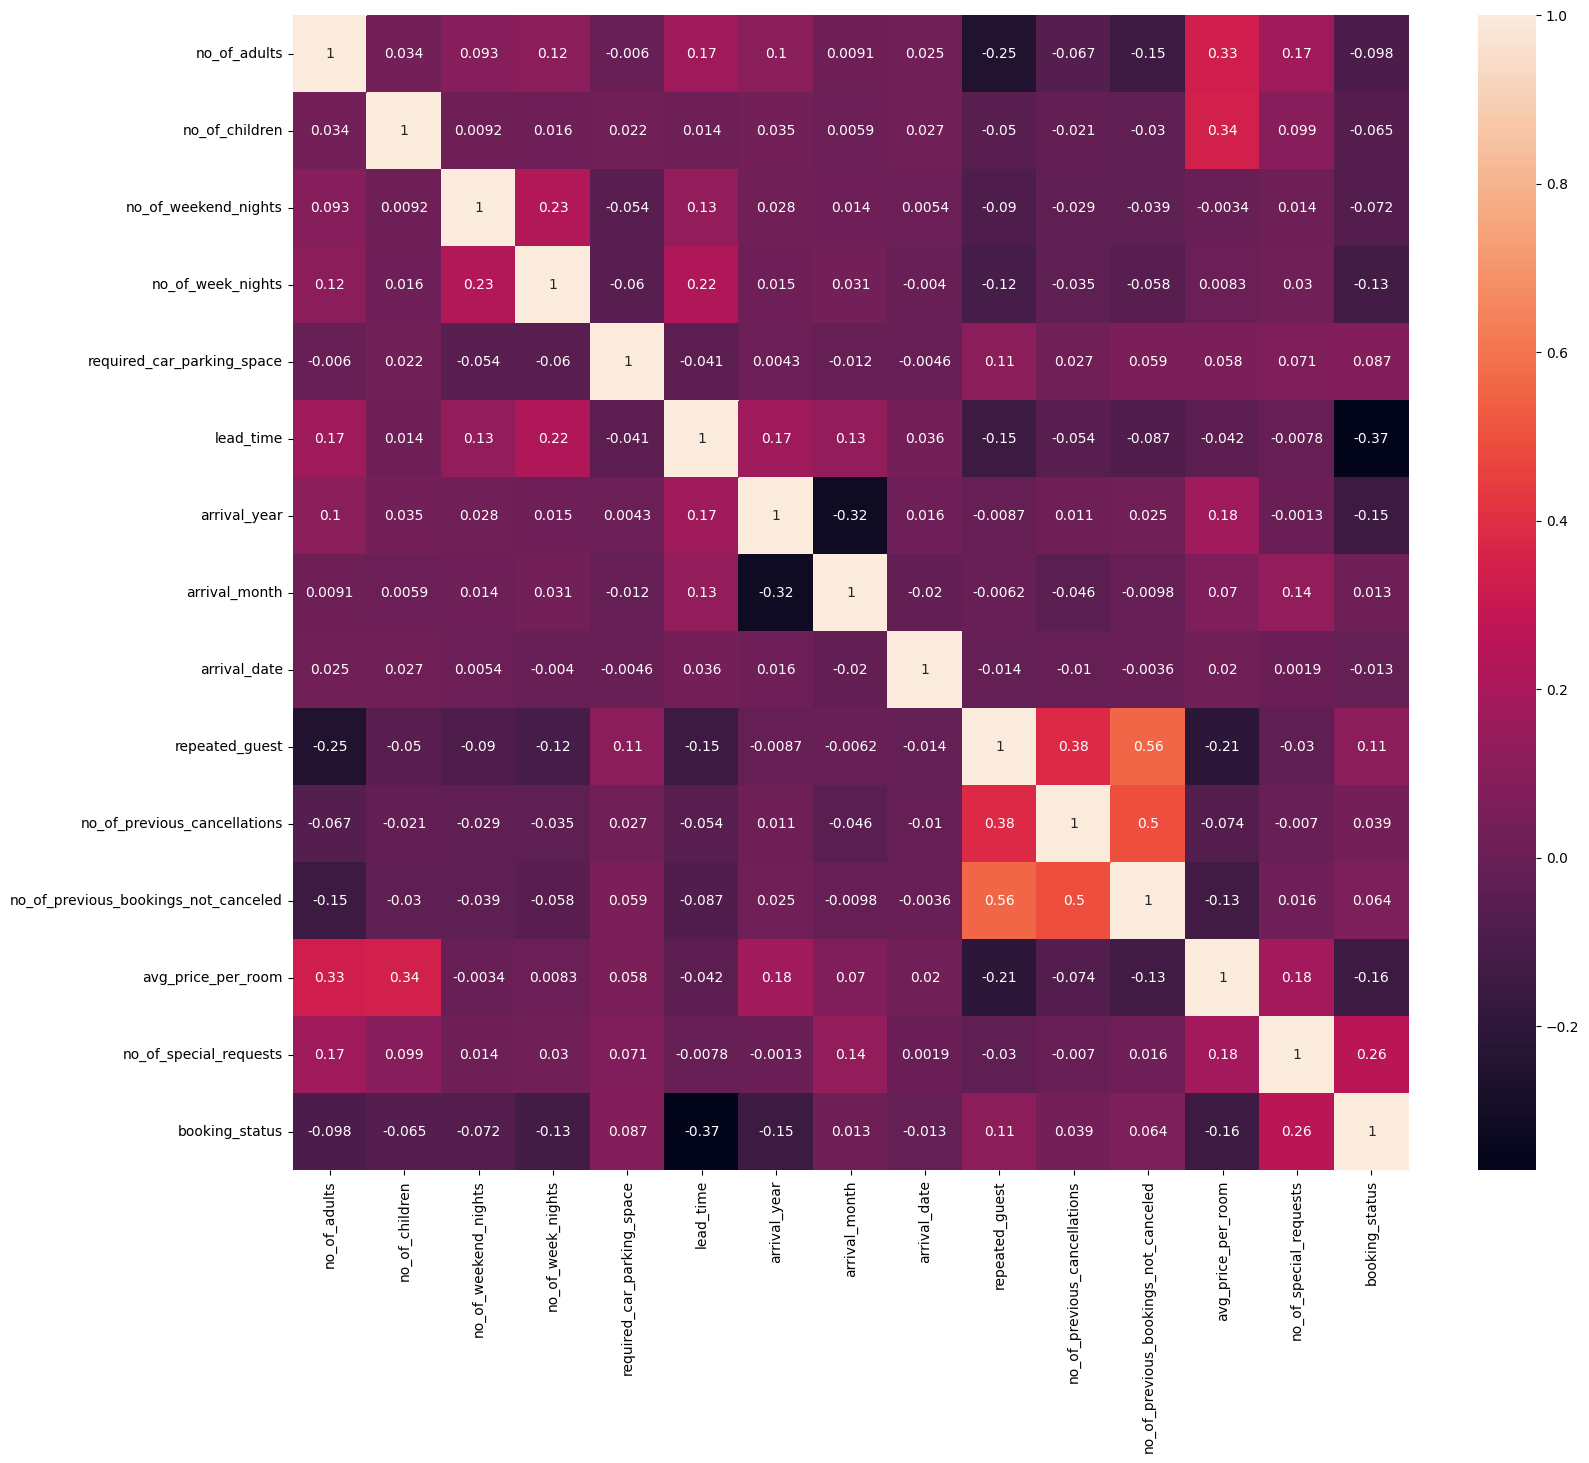

In [30]:
plt.figure(figsize=(18,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [31]:
data=pd.get_dummies(data)

# modelling

In [32]:
x=data.drop('booking_status',axis=1).values
y=data['booking_status'].values

In [33]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)

In [34]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_x,train_y)

LogisticRegression()

In [35]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
def evalute_model(test_x,test_y,model):
    y_pred=model.predict(test_x)
    acc=accuracy_score(test_y,y_pred)
    f1=f1_score(test_y,y_pred)
    recall=recall_score(test_y,y_pred)
    precision=precision_score(test_y,y_pred)
    cm=confusion_matrix(test_y,y_pred)
    specificity=cm[1,1]/(cm[1,0]+cm[1,1])
    return pd.Series({"accuracy":acc,"F1":f1,"Recall":recall,"Precision":precision,"specificity":specificity})

In [36]:
 evalute_model(test_x,test_y,model)

accuracy       0.802115
F1             0.868465
Recall         0.915633
Precision      0.825918
specificity    0.915633
dtype: float64

In [38]:
sns.set()